In [0]:
from google.colab import drive      #mounting drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd   #importing pandas
import numpy as np    #importing numpy
identity = pd.read_csv('/content/drive/My Drive/Fraud detection/train_identity.csv')   #reading identity data

In [0]:
print(f'identity has {identity.shape[0]} rows and {identity.shape[1]} columns')     #checking for the number of rows and columns

identity has 144233 rows and 41 columns


In [0]:
identity.head()   #checking for the head

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [0]:
identity.info()   #checking for the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [0]:
transaction = pd.read_csv('/content/drive/My Drive/Fraud detection/train_transaction.csv')  #reading the transaction data

In [0]:
print(f'transaction has {transaction.shape[0]} rows and {transaction.shape[1]} columns')   #checking the rows and columns of transaction data

transaction has 590540 rows and 394 columns


In [0]:
transaction.head()   #checking for the head

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
transaction.info()      #checking for the information of the transaction table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [0]:
train = transaction.merge(identity, how = 'left')  #merging transaction and identity data

In [0]:
len(train['TransactionID'].unique())      #checking for the unique TransactionIDs

590540

In [0]:
print(f'train data has {train.shape[0]} rows and {train.shape[1]} columns')  #checking the shape of train data

train data has 590540 rows and 434 columns


In [0]:
train.head()    #checking for the head of train data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [0]:
identity.apply(lambda x: x.nunique())  #checking for the number of unique values in each column of identity table

TransactionID    144233
id_01                77
id_02            115655
id_03                24
id_04                15
id_05                93
id_06               101
id_07                84
id_08                94
id_09                46
id_10                62
id_11               365
id_12                 2
id_13                54
id_14                25
id_15                 3
id_16                 2
id_17               104
id_18                18
id_19               522
id_20               394
id_21               490
id_22                25
id_23                 3
id_24                12
id_25               341
id_26                95
id_27                 2
id_28                 2
id_29                 2
id_30                75
id_31               130
id_32                 4
id_33               260
id_34                 4
id_35                 2
id_36                 2
id_37                 2
id_38                 2
DeviceType            2
DeviceInfo         1786
dtype: int64

In [0]:
test_transaction = pd.read_csv('/content/drive/My Drive/Fraud detection/test_transaction.csv')  #reading the test transaction data

In [0]:
print(f'test_transaction has {test_transaction.shape[0]} rows and {test_transaction.shape[1]} columns')  #checking the shape of test transaction data

test_transaction has 506691 rows and 393 columns


In [0]:
test_identity = pd.read_csv('/content/drive/My Drive/Fraud detection/test_identity.csv')  #reading the test identity data

In [0]:
print(f'test_identity has {test_identity.shape[0]} rows and {test_identity.shape[1]} columns')  #checking the shape of test identity data

test_identity has 141907 rows and 41 columns


In [0]:
test = pd.merge(test_transaction,test_identity, on ='TransactionID', how='left')   #merging test_transaction and test_identity data

In [0]:
import matplotlib.pyplot as plt  #importing matplotlib for visualization
%matplotlib inline

##DATA CLEANING, DATA ANALYSIS AND FEATURE ENGINEERING

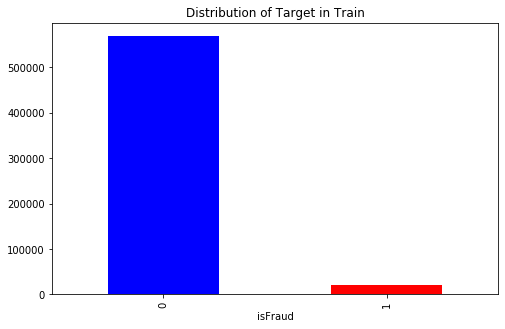

In [0]:
train.groupby('isFraud').count()['TransactionID'].plot(kind='bar',
          title='Distribution of Target in Train',color=('b','r'),                            #plotting bargraph for checking the count of transactions that are fraudulent and non-fraudulent
          figsize=(8, 5))
plt.show()

In above graph we can see that the fraud cases are very less as compared to non-fraud cases.

In [0]:
#looking at the target column
trainf = train['isFraud'].value_counts().reset_index().rename({'index':'Values','isFraud':'Count'},axis=1)   #we are looking for the counts of transaction which are fraud and which are not fraud
trainf['Shares'] = np.round(trainf['Count']/trainf['Count'].sum(),6)
trainf

,Values,Count,Shares
0,0,569877,0.96501
1,1,20663,0.03499


We see that about 96.5% of transactions are Non-Fraud and only 3.5% are fraud cases. There is high class imbalance in our dataset that is going to effect the validation and evaluation strategy that we are going to choose. 

## The feature TransactionDT is timedelta from a given refrence datetime.
Train and test appear to be split by time, let's have a look at it


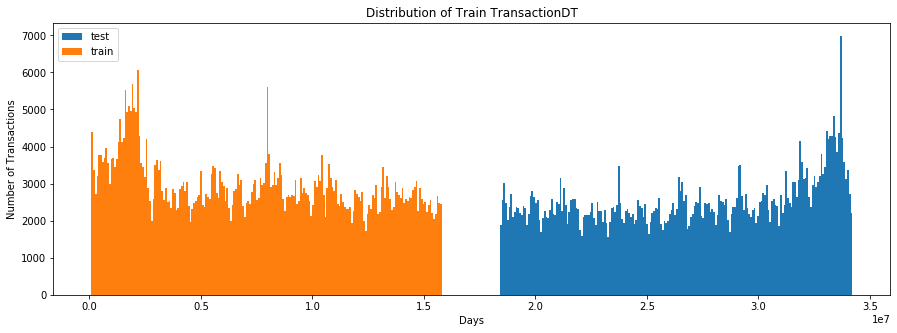

In [0]:
plt.figure(figsize=(15,5))
plt.hist(test['TransactionDT'],label='test',bins=200)
plt.hist(train['TransactionDT'],label='train',bins=200)
plt.title('Distribution of Train TransactionDT')
plt.xlabel('Days')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

In [0]:
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24   #adding new feature transaction_hour which is mmade from TransactionDT column

In [0]:
percentage = lambda i: len(i) / float(len(train['Transaction_hour'])) * 100

In [0]:
train_hour = (train.groupby(['isFraud'])['Transaction_hour']
                     .value_counts(normalize=True)
                     .rename('percentage')              
                     .mul(100)
                     .reset_index()
                     .sort_values('Transaction_hour'))

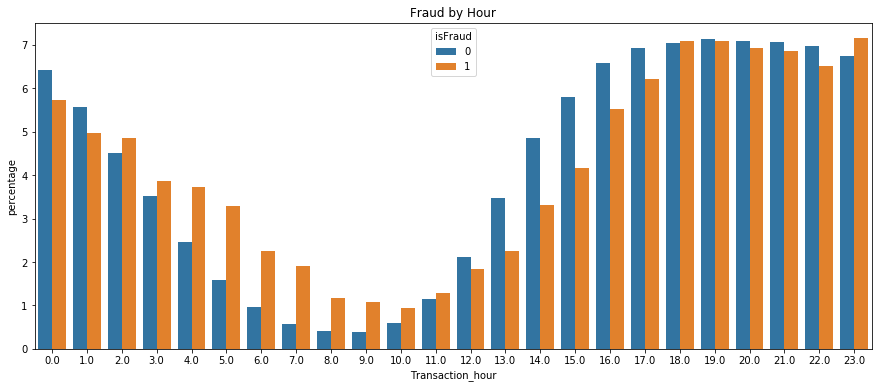

In [0]:
#plotting percentage of fraud by transaction hour
import seaborn as sns
plt.figure(figsize=(15,6))
sns.barplot(x="Transaction_hour", y="percentage", hue="isFraud", data=train_hour)
plt.title('Fraud by Hour')
plt.show()

In above graph we can see that from hour 2 - 11 the number of fraud cases are more as compared to non-fraud cases.

In [0]:
train['transaction_day'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)  #adding one more new feature transaction_day

In [0]:
percentage = lambda i: len(i) / float(len(train['transaction_day'])) * 100

In [0]:
train_day = (train.groupby(['isFraud'])['transaction_day']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('transaction_day'))

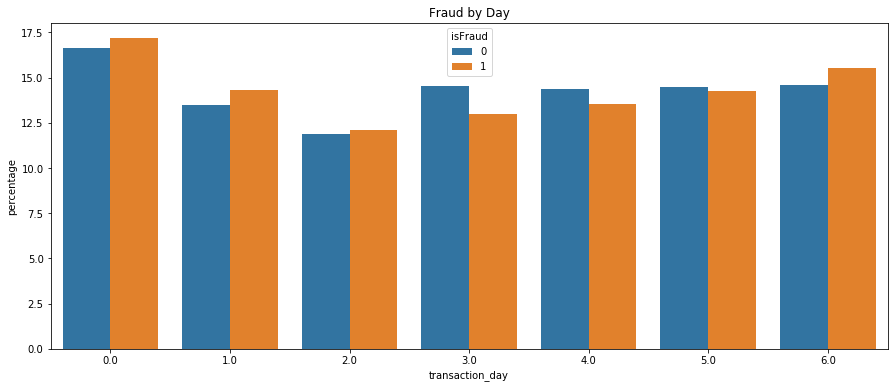

In [0]:
#plotting bargraph to check the percentage of fraud by days
plt.figure(figsize=(15,6))
sns.barplot(x="transaction_day", y="percentage", hue="isFraud", data=train_day)
plt.title('Fraud by Day')
plt.show()

In above graph we ccan see that on day 6,0 and 1 there are more number of fraud cases.

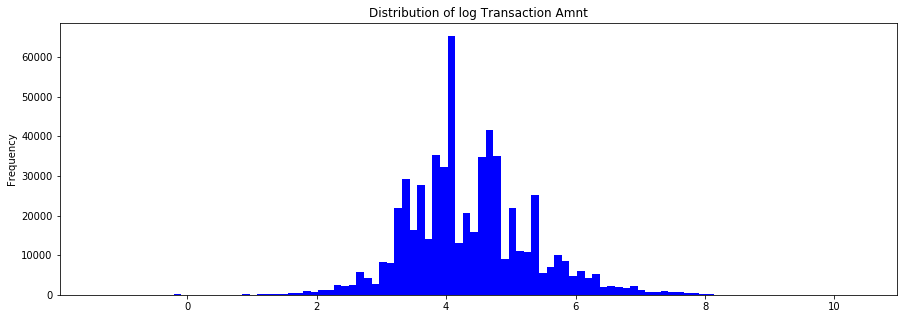

In [0]:
train["TransactionAmt"].apply(np.log).plot(kind='hist',figsize=(15,5),
                                           title='Distribution of log Transaction Amnt',
                                           bins=100,color='blue')     #checking for the distribution of transaction amount
plt.show()

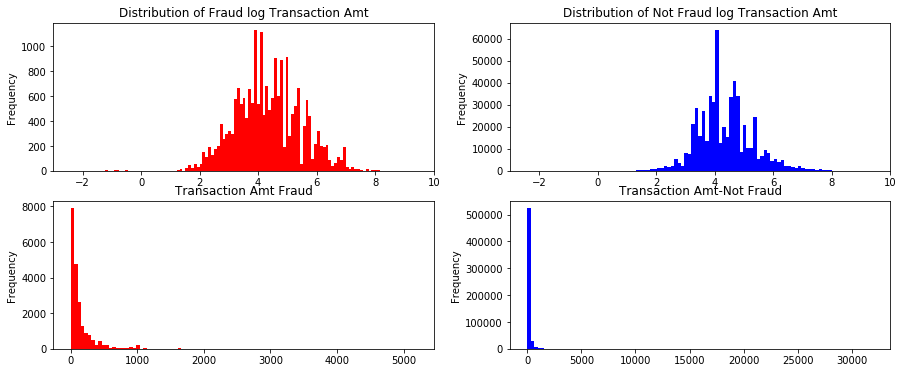

In [0]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,6))

#checking for the distribution of log TransactionAmt where the cases are fradulent 
train.loc[train['isFraud']==1]['TransactionAmt'].apply(np.log).plot(kind='hist',
          title='Distribution of Fraud log Transaction Amt',
          bins=100,                                                             
          color='red',
          xlim=(-3,10),
          ax=ax1)

#checking for the distribution of log TransactionAmt where the cases are non-fradulent
train.loc[train['isFraud']==0]['TransactionAmt'].apply(np.log).plot(kind='hist',
          title='Distribution of Not Fraud log Transaction Amt',
          bins=100,
          color='blue',
          xlim=(-3,10),
          ax=ax2)

#checking for the distribution of TransactionAmt where the cases are fradulent
train.loc[train['isFraud']==1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          color='red',
          title='Transaction Amt Fraud',
          ax=ax3)
    
#checking for the distribution of TransactionAmt where the cases are non-fradulent
train.loc[train['isFraud']==0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          color='blue',
          title='Transaction Amt-Not Fraud',
          ax=ax4)
plt.show()

In [0]:
print('Mean transaction amt for fraud is {:.4f}'.format(train.loc[train['isFraud']==1]['TransactionAmt'].mean()))   #checking for the mean of TransactionAmt for fradulent cases
print('Mean Amt for non - fraud is {:.4f}'.format(train.loc[train['isFraud']== 0]['TransactionAmt'].mean()))        #checking for the mean of TransactionAmt for non fradulent cases

Mean transaction amt for fraud is 149.2448
Mean Amt for non - fraud is 134.5117


In [0]:
train['ProductCD'].unique()  #checking for the unique values in ProductCD columns

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

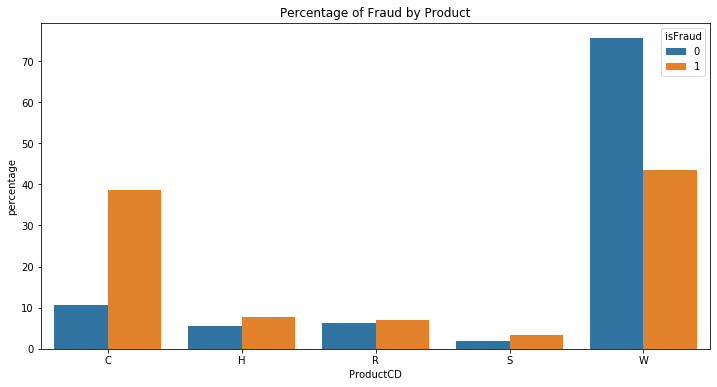

In [0]:
plt.figure(figsize=(12,6))
train_ProductCD = (train.groupby(['isFraud'])['ProductCD']
                     .value_counts(normalize=True)
                     .rename('percentage')                     #plotting bar graph to check the percentage of fraud by product
                     .mul(100)
                     .reset_index()
                     .sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD)
plt.title('Percentage of Fraud by Product')
plt.show()

In [0]:
len(train['card1'].unique())   #checking for unique values in card1

13553

In [0]:
train['card1'].isnull().sum()      #checking for null values in card1

0

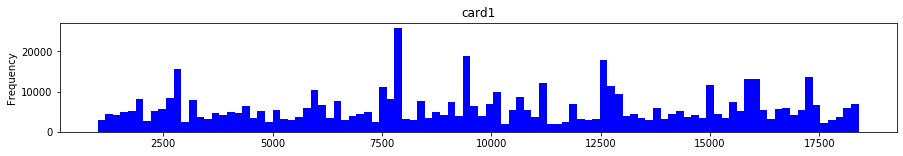

In [0]:
train['card1'].plot(kind='hist',
                    title='card1',
                    bins=100,            #checking the distribution of card1
                    color='blue',
                    figsize=(15,2))
plt.show()

In [0]:
len(train['card2'].unique())         #checking for the unique number of values in card2

501

In [0]:
train['card2'].isnull().sum()        #checking for the null values in card2

8933

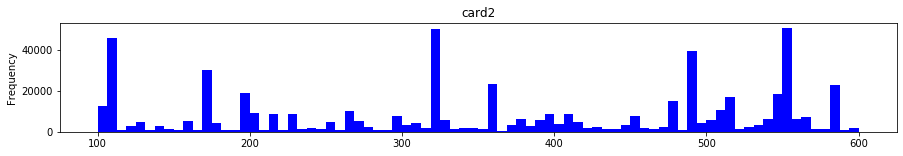

In [0]:
train['card2'].plot(kind='hist',
                    bins=80,
                    title='card2',      #looking at the distribution of card2
                    color='blue',
                    figsize=(15,2))
plt.show()

In [0]:
len(train['card3'].unique())          #checking for unique number of values in card3

115

In [0]:
train['card3'].isnull().sum()         #checking for number of null values in card3

1565

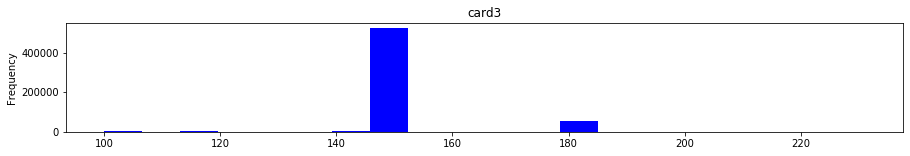

In [0]:
train['card3'].plot(kind='hist',
                    bins=20,
                    title='card3',    #looking at the distribution of card3
                    color='blue',
                    figsize=(15,2))
plt.show()

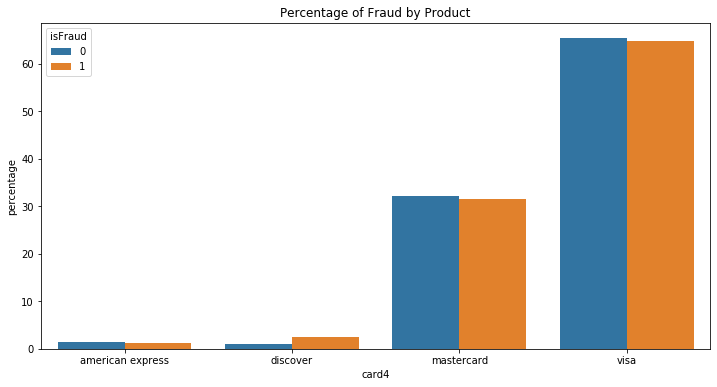

In [0]:
plt.figure(figsize=(12,6))
train_card4 = (train.groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')                     #plotting bar graph to check the percentage of fraud by card type
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)
plt.title('Percentage of Fraud by Product')
plt.show()

In [0]:
train['card5'].describe()    #looking at the description of card5

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

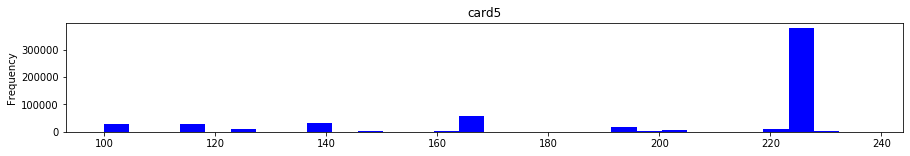

In [0]:
train['card5'].plot(kind='hist',
                    bins=30,
                    title='card5',      #looking at the distribution of card5
                    color='blue',
                    figsize = (15,2))
plt.show()

In [0]:
train_nfraud = train[(train['isFraud']==0)]
train_fraud = train[(train['isFraud']==1)]

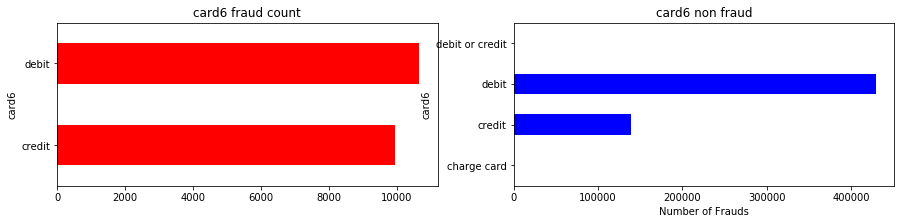

In [0]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
#checking the number of fraud cases with respect to values in card6
train_fraud.groupby('card6')['card6'].count().plot(kind='barh',
                                                  ax=ax1,
                                                  color='red',
                                                  title='card6 fraud count')
plt.xlabel('Number of Frauds')

#checking the number of non-fraud cases with respect to values in card6
train_nfraud.groupby('card6')['card6'].count().plot(kind='barh',
                                           ax=ax2,
                                           color='blue',
                                           title='card6 non fraud')
plt.xlabel('Number of Frauds')
plt.show()

In [0]:
train['addr1'].describe()    #looking at the description of addr1

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

In [0]:
train['addr1'].nunique()    #checking for unique values in addr1

332

In [0]:
train['addr1'].isnull().sum()  #xchecking for null values in addr1

65706

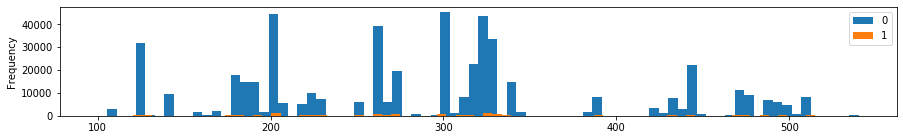

In [0]:
train.groupby('isFraud')['addr1'].plot(kind='hist',bins=80,figsize=(15,2))   #checking distribution of the fraud cases with addr1
plt.legend()
plt.show()

In [0]:
train['addr2'].nunique()    #checking the number of unique values in addr2

74

In [0]:
train['addr2'].describe()   #looking at the description of addr2

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

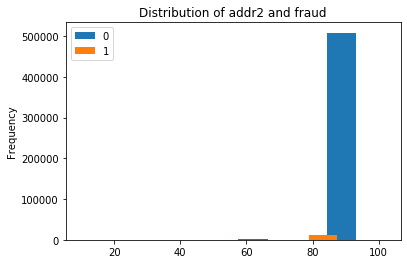

In [0]:
#looking at the distribution of addr2 and fraud
train.groupby('isFraud')['addr2'].plot(kind='hist',bins=10, title = 'Distribution of addr2 and fraud')
plt.legend()
plt.show()

In [0]:
train['dist1'].nunique()   #checking the number of unique values in dist1

2651

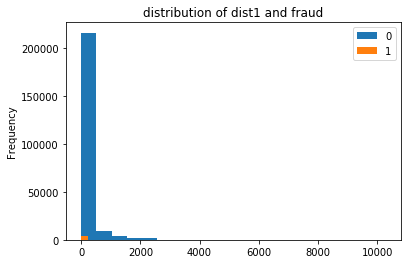

In [0]:
train.groupby('isFraud')['dist1'].plot(kind='hist',bins=20,title='distribution of dist1 and fraud')   #looking at the distribution of dist1 and fraud
plt.legend()
plt.show()

In [0]:
train['dist2'].nunique()   #checking the number of unique values in dist2

1751

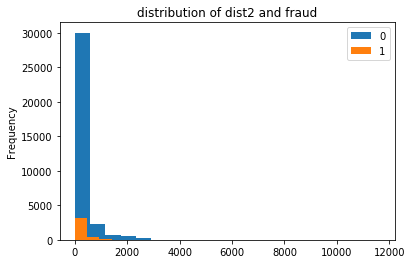

In [0]:
#looking at the distribution of dist2 and fraud
train.groupby('isFraud')['dist2'].plot(kind = 'hist',bins=20,title='distribution of dist2 and fraud')
plt.legend()
plt.show()

In [0]:
train['P_emaildomain'].describe()  #checking the description of P_emaildomain

count        496084
unique           59
top       gmail.com
freq         228355
Name: P_emaildomain, dtype: object

In [0]:
train['P_emaildomain'].isnull().sum()  #checking the null values in P_emaildomain

94456

In [0]:
train['R_emaildomain'].describe()  #checking the description of R_emaildomain

count        137291
unique           60
top       gmail.com
freq          57147
Name: R_emaildomain, dtype: object

In [0]:
train['R_emaildomain'].isnull().sum() #checking the null values in R_emaildomain

453249

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

In [0]:
for i in range(1,15):
  print(train['C' + str(i)].value_counts(dropna = 'False').head())     #looking at the head of the  number of values counts in all the C columns

1.0    316791
2.0    105071
3.0     51315
4.0     28845
5.0     17922
Name: C1, dtype: int64
1.0    316261
2.0    103948
3.0     51770
4.0     28251
5.0     16971
Name: C2, dtype: int64
0.0    588111
1.0      2137
2.0       180
3.0        58
4.0         7
Name: C3, dtype: int64
0.0    451883
1.0    111817
2.0     12994
3.0      4949
4.0      1902
Name: C4, dtype: int64
0.0    372435
1.0    122883
2.0     34776
3.0     13189
4.0      6828
Name: C5, dtype: int64
1.0    341552
2.0     86103
0.0     49066
3.0     35490
4.0     17805
Name: C6, dtype: int64
0.0    523142
1.0     51966
2.0      7314
3.0      2033
4.0      1109
Name: C7, dtype: int64
0.0    447667
1.0    104994
2.0     15927
3.0      5493
4.0      2817
Name: C8, dtype: int64
1.0    228938
0.0    183795
2.0     77829
3.0     32505
4.0     16196
Name: C9, dtype: int64
0.0    453442
1.0    100231
2.0     14938
3.0      6417
4.0      2836
Name: C10, dtype: int64
1.0    389692
2.0     89677
3.0     34463
4.0     16051
5.0      9972

In [0]:
for i in range(1,15):
  print(train['C' + str(i)].describe())   #checking the description of all the 15 C columns

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64
count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64
count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64
count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64
count    590540.000000
mean          5.571526
std          25.786976
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max

In [0]:
for i in range(1,15):
  print(train['C' + str(i)].nunique())    #checking the number of unique values in all C columns

1657
1216
27
1260
319
1328
1103
1253
205
1231
1476
1199
1597
1108


In [0]:
for i in range(1,15):
  print(train['C' + str(i)].isnull().sum())   #checking for the null values in C columns

0
0
0
0
0
0
0
0
0
0
0
0
0
0


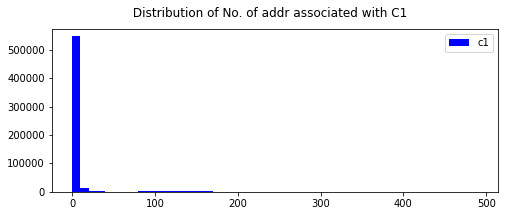

In [0]:
plt.figure(figsize=(8,3))
plt.hist(train['C1'], bins =np.arange(0,500,step=10),color='blue', label = 'c1')
plt.suptitle(' Distribution of No. of addr associated with C1')
plt.legend()
plt.show()

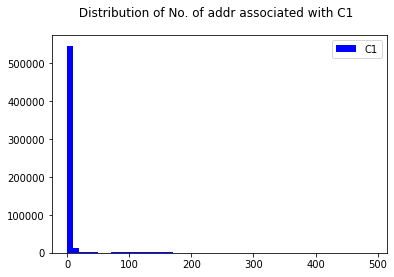

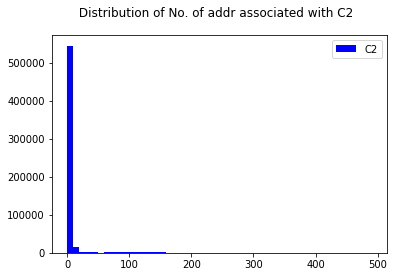

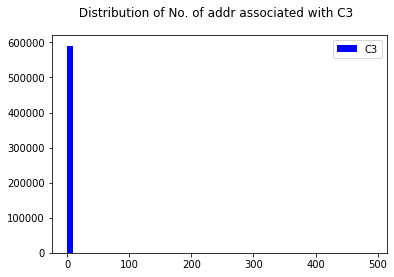

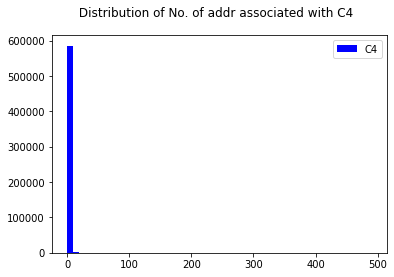

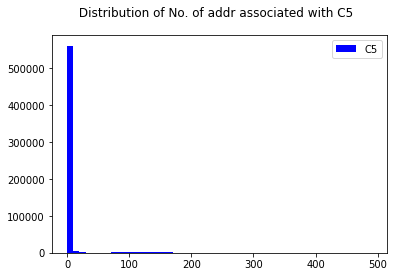

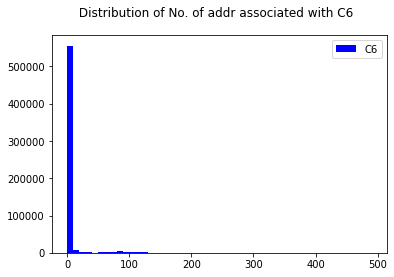

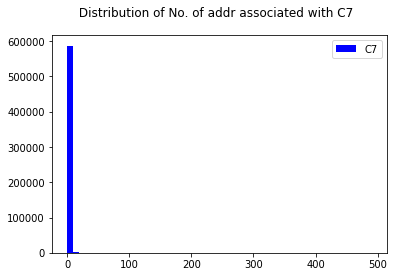

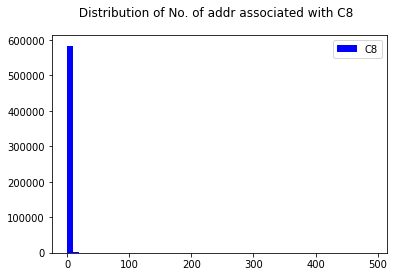

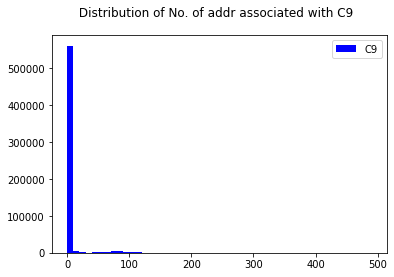

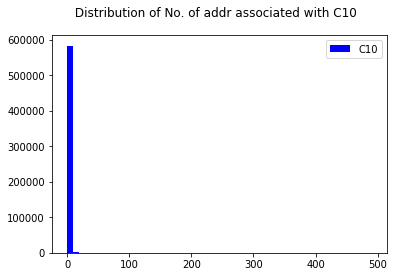

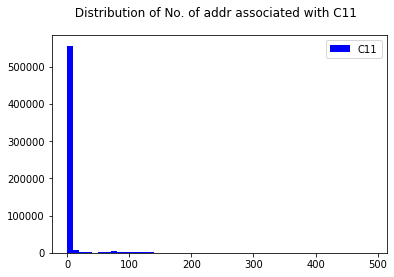

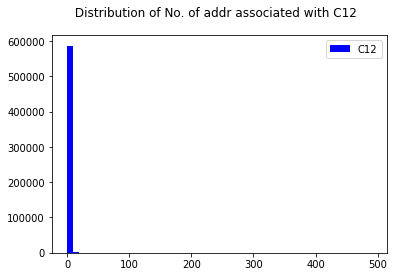

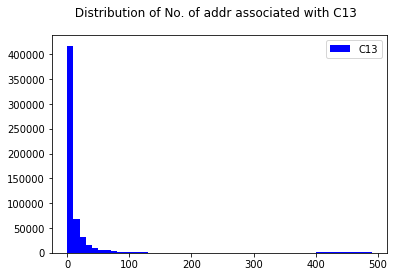

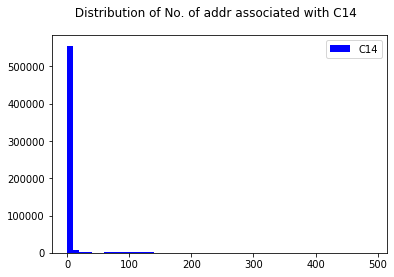

In [0]:
for i in range(1,15):
  plt.hist(train['C' + str(i)], bins =np.arange(0,500,step=10),color='blue', label = 'C' + str(i))
  plt.suptitle(' Distribution of No. of addr associated with C' + str(i)) 
  plt.legend()
  plt.show()

D1-D15: timedelta, such as days between previous transaction, etc.

In [0]:
for i in range(1,16):
  print(train['D' + str(i)].value_counts(dropna = False).head())

0.0    280130
1.0      8634
2.0      4969
3.0      3954
4.0      3570
Name: D1, dtype: int64
NaN    280797
0.0     15124
1.0      6654
2.0      4454
3.0      3677
Name: D2, dtype: int64
NaN    262878
0.0     73094
1.0     21258
2.0     13789
7.0     13320
Name: D3, dtype: int64
NaN    168922
0.0    166571
1.0      5315
2.0      3385
3.0      2572
Name: D4, dtype: int64
NaN    309841
0.0     65377
1.0     15282
2.0     10244
7.0      9734
Name: D5, dtype: int64
NaN      517353
0.0       45782
1.0        1588
256.0       895
2.0         855
Name: D6, dtype: int64
NaN    551623
0.0     21135
1.0      1717
2.0       998
3.0       791
Name: D7, dtype: int64
NaN         515614
0.791666      1351
0.833333      1327
0.875000      1304
0.958333      1300
Name: D8, dtype: int64
NaN         515614
0.791666      5388
0.833333      5273
0.750000      5147
0.708333      5132
Name: D9, dtype: int64
0.0    221930
NaN     76022
1.0      5186
2.0      3482
3.0      2756
Name: D10, dtype: int64
NaN    27

In [0]:
for i in range(1,16):
  print(train['D' + str(i)].nunique())

641
641
649
808
688
829
597
12353
24
818
676
635
577
802
859


In [0]:
for i in range(1,16):
  print(train['D' + str(i)].isnull().sum())

1269
280797
262878
168922
309841
517353
551623
515614
515614
76022
279287
525823
528588
528353
89113


In [0]:
for i in range(1,16):
  print(train['D' + str(i)].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


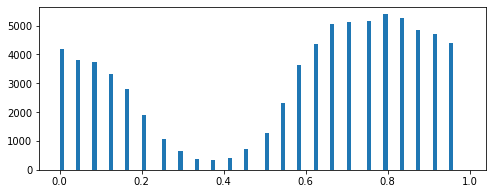

In [0]:
plt.figure(figsize=(8,3))
plt.hist(train['D9'],bins=np.arange(0,1,step=0.01))
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


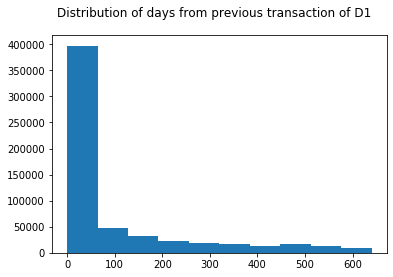

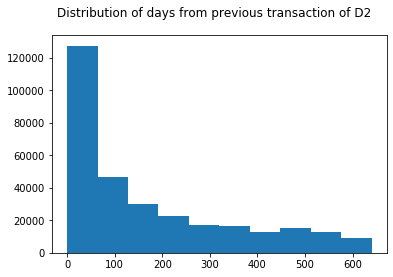

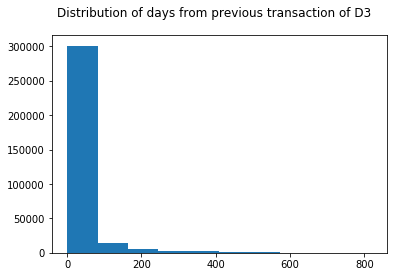

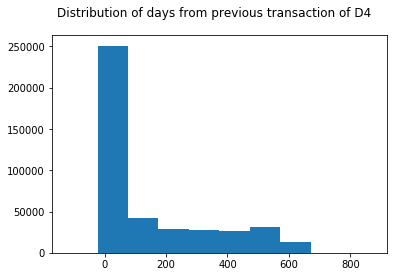

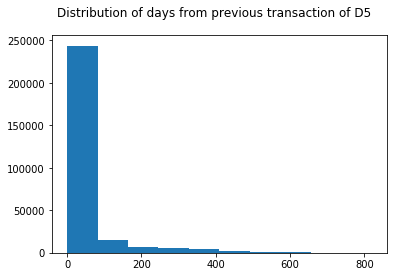

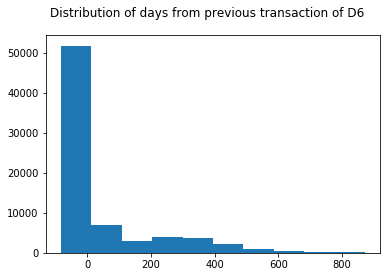

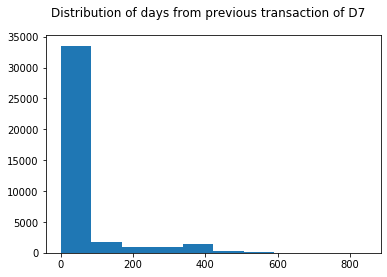

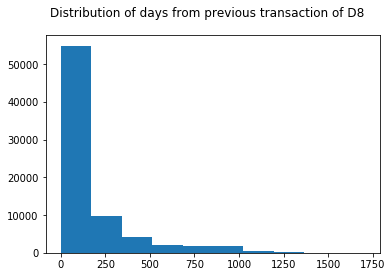

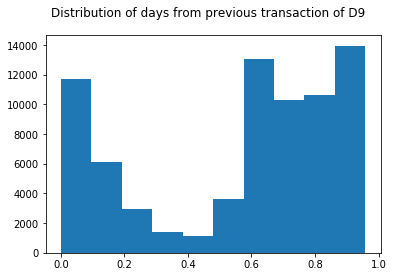

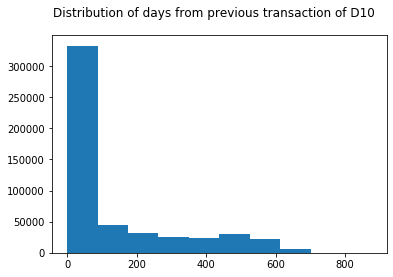

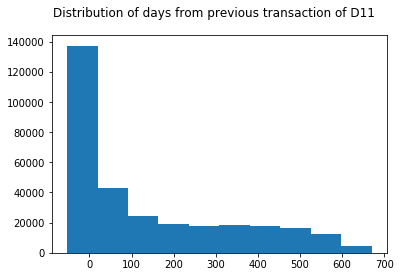

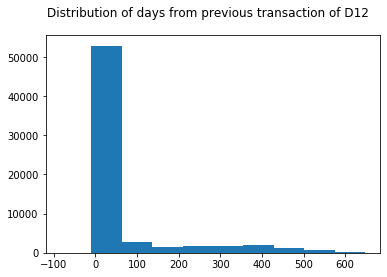

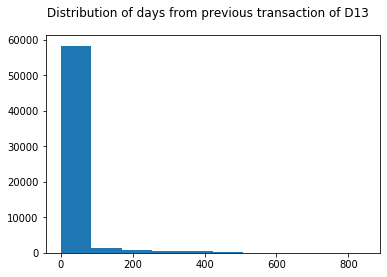

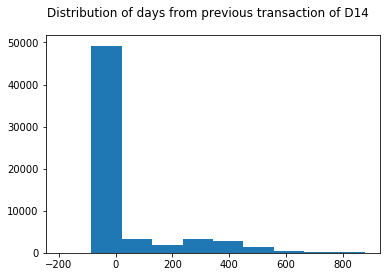

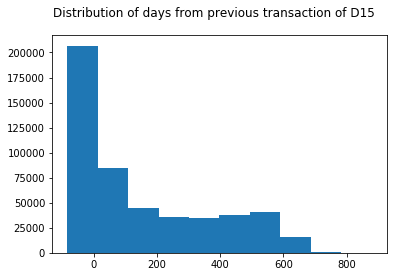

In [0]:
for i in range(1,16):
  plt.hist(train['D' + str(i)])
  plt.suptitle('Distribution of days from previous transaction of D' + str(i))
  plt.show()

M1-M9: match, such as names on card and address, etc.

In [0]:
for i in range(1,10):
  print(train['M' + str(i)].dtype)

object
object
object
object
object
object
object
object
object


In [0]:
for i in range(1,10):
  print(train['M' + str(i)].value_counts(dropna=False).head().sort_index())

F          25
T      319415
NaN    271100
Name: M1, dtype: int64
F       33972
T      285468
NaN    271100
Name: M2, dtype: int64
F       67709
T      251731
NaN    271100
Name: M3, dtype: int64
M0     196405
M1      52826
M2      59865
NaN    281444
Name: M4, dtype: int64
F      132491
T      107567
NaN    350482
Name: M5, dtype: int64
F      227856
T      193324
NaN    169360
Name: M6, dtype: int64
F      211374
T       32901
NaN    346265
Name: M7, dtype: int64
F      155251
T       89037
NaN    346252
Name: M8, dtype: int64
F       38632
T      205656
NaN    346252
Name: M9, dtype: int64


In [0]:
for i in range(1,10):
  train['M'+str(i)].fillna('None',inplace=True)

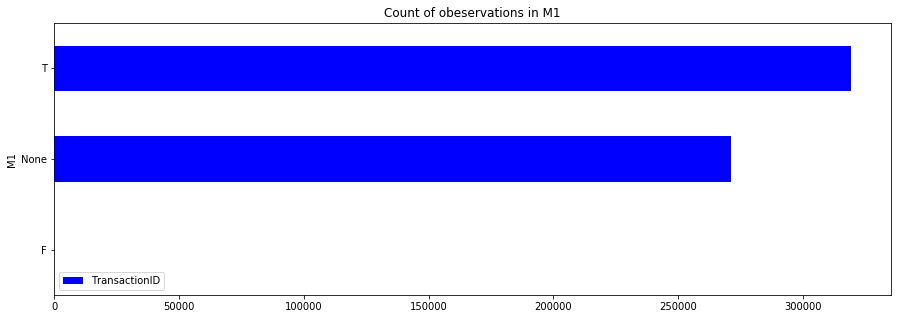

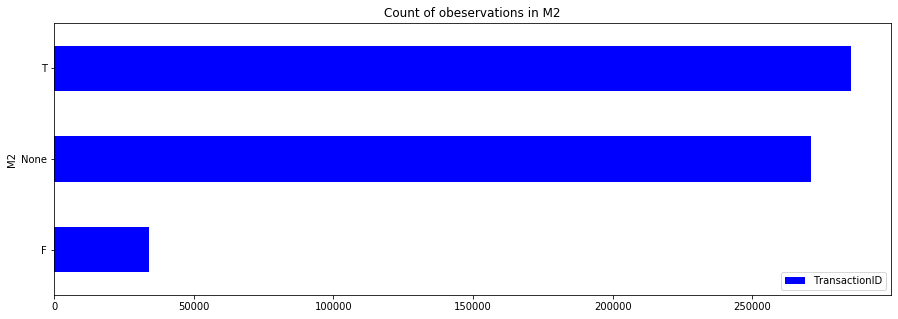

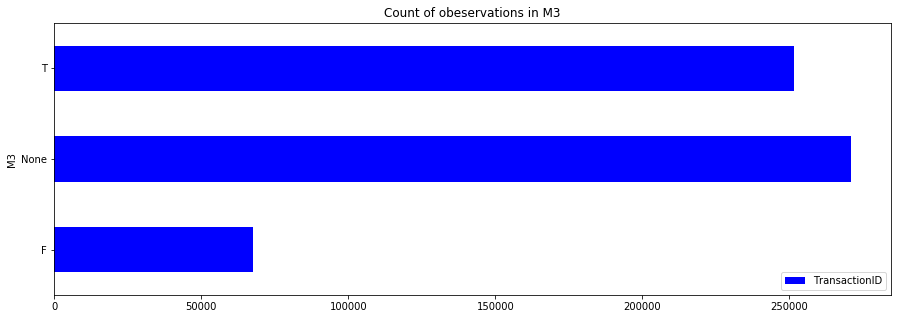

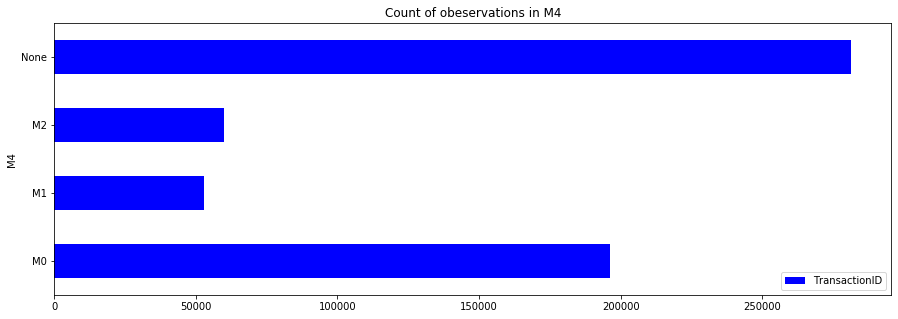

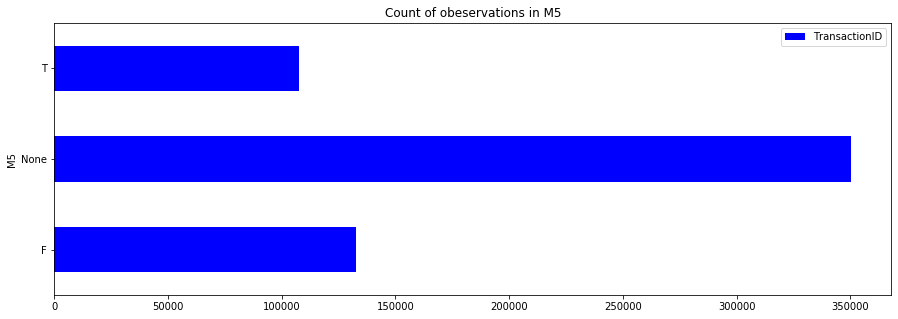

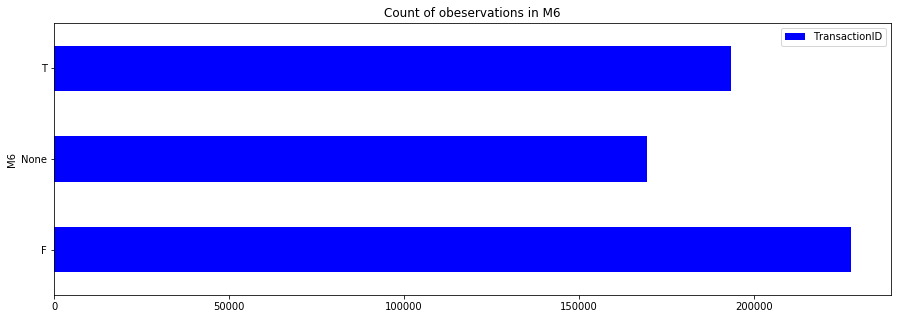

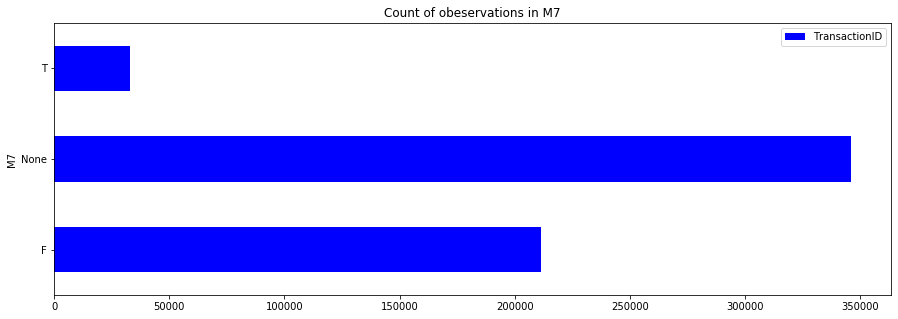

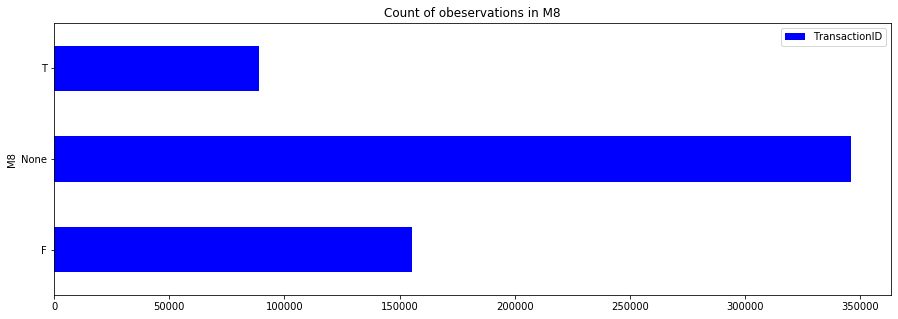

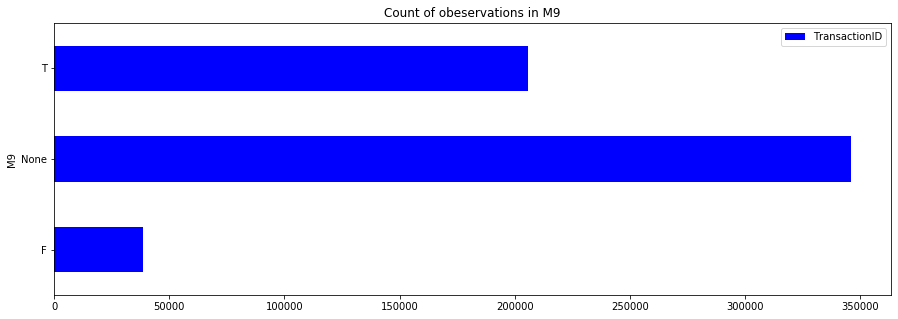

In [0]:
for i in range(1,10):
  train.groupby('M'+str(i))['TransactionID'].count().sort_index().plot(kind='barh',figsize=(15,5),color='blue',title = 'Count of obeservations in M'+str(i))
  plt.legend()
  plt.show()

In [0]:
train['id_01'].value_counts(dropna=False).head()

 NaN     446307
-5.0      82170
 0.0      19555
-10.0     11257
-20.0     11211
Name: id_01, dtype: int64

In [0]:
train['id_03'].nunique()

24

In [0]:
for i in range(1,10):
  print(train['id_0'+str(i)].value_counts(dropna=False).head())

 NaN     446307
-5.0      82170
 0.0      19555
-10.0     11257
-20.0     11211
Name: id_01, dtype: int64
NaN       449668
1102.0        11
696.0         10
1116.0         9
1120.0         9
Name: id_02, dtype: int64
NaN    524216
0.0     63903
1.0       863
3.0       668
2.0       421
Name: id_03, dtype: int64
 NaN    524216
 0.0     65739
-5.0       132
-6.0        98
-8.0        64
Name: id_04, dtype: int64
NaN    453675
0.0     92743
1.0      8293
2.0      4937
3.0      3854
Name: id_05, dtype: int64
 NaN    453675
 0.0     91325
-1.0      4687
-5.0      3849
-6.0      3257
Name: id_06, dtype: int64
NaN     585385
0.0        409
16.0       245
14.0       228
12.0       208
Name: id_07, dtype: int64
 NaN      585385
-100.0       500
 0.0         261
-34.0        257
-33.0        209
Name: id_08, dtype: int64
NaN    515614
0.0     70378
1.0      1616
3.0       966
2.0       773
Name: id_09, dtype: int64


In [0]:
for i in range(1,10):
  print(train['id_0'+str(i)].nunique())

77
115655
24
15
93
101
84
94
46


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


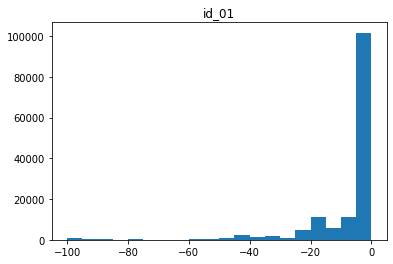

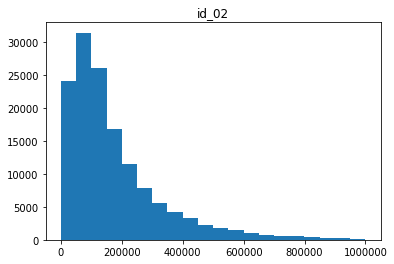

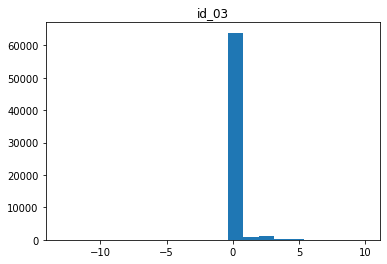

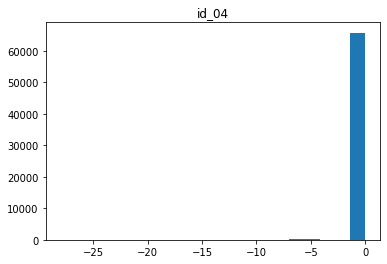

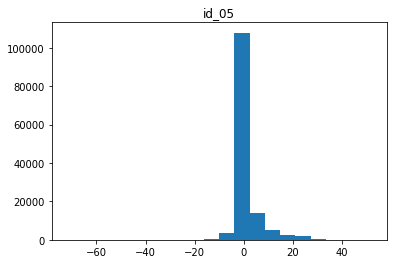

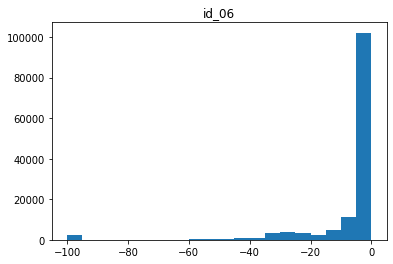

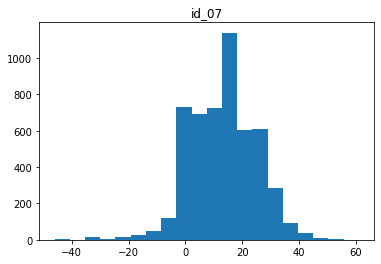

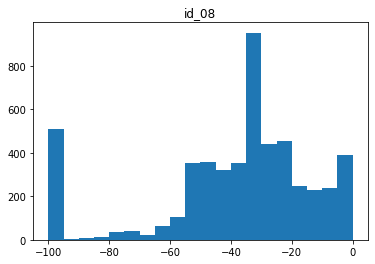

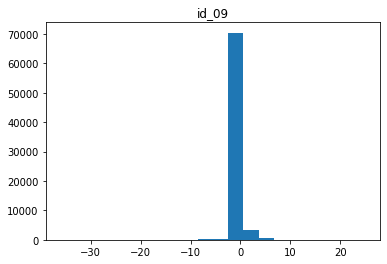

In [0]:
for i in range(1,10):
  plt.hist(train['id_0'+str(i)],bins=20)
  plt.title('id_0'+str(i))
  plt.show()

In [0]:
for i in range(10,39):
  print(train['id_'+str(i)].value_counts(dropna=False).head())

 NaN    515614
 0.0     72879
-6.0       295
-5.0       247
-1.0       200
Name: id_10, dtype: int64
NaN           449562
100.000000    133162
95.080002       1231
95.160004        754
97.120003        440
Name: id_11, dtype: int64
NaN         446307
NotFound    123025
Found        21208
Name: id_12, dtype: int64
NaN     463220
52.0     58099
49.0     26365
64.0     14429
33.0     10048
Name: id_13, dtype: int64
 NaN      510496
-300.0     44121
-360.0     16661
-480.0     12891
-420.0      4542
Name: id_14, dtype: int64
NaN        449555
Found       67728
New         61612
Unknown     11645
Name: id_15, dtype: int64
NaN         461200
Found        66324
NotFound     63016
Name: id_16, dtype: int64
NaN      451171
166.0     78631
225.0     56968
102.0       689
159.0       352
Name: id_17, dtype: int64
NaN     545427
15.0     25489
13.0     13439
12.0      4656
18.0       650
Name: id_18, dtype: int64
NaN      451222
266.0     19849
410.0     11318
427.0      8808
529.0      8122
Name:

In [0]:
for i in range(10,39):
  print(train['id_'+str(i)].nunique())

62
365
2
54
25
3
2
104
18
522
394
490
25
3
12
341
95
2
2
2
75
130
4
260
4
2
2
2
2


In [0]:
train['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

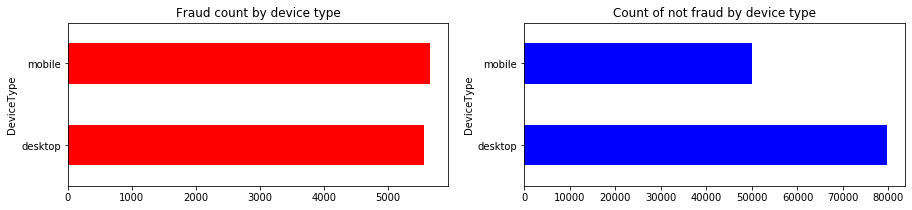

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,3))
train_fraud.groupby('DeviceType')['DeviceType'].count().sort_index().plot(kind='barh',
                                                                          color='red',
                                                   title='Fraud count by device type',
                                                                         ax=ax1)
train_nfraud.groupby('DeviceType')['DeviceType'].count().sort_index().plot(kind='barh',
                                                                           color='blue',
                                                                          title='Count of not fraud by device type',
                                                                          ax=ax2)
plt.show()

#NULL VALUES IMPUTATION

In [0]:
null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]

In [0]:
train.drop(null_cols,axis=1,inplace=True)

In [0]:
for i in train.columns:
    if train[i].dtypes=='int64' or train[i].dtypes=='float64':
        train[i].fillna(train[i].mean(),inplace=True)

In [0]:
for i in train.columns:
    if train[i].dtypes=='object':
        train[i].fillna(train[i].mode()[0],inplace=True)

There are 340 V_Columns, it is time consuming to do EDA for all these columns. 
So we directly applied PCA on these columns.

In [0]:
train_vcol =[]
for i in range(1,340):
  train_vcol.append('V'+str(i))

In [0]:
vcol=train[train_vcol]

In [0]:
ab=[]
from sklearn.decomposition import PCA
for i in range(1,20):
  pca = PCA(n_components = i)
  pca.fit(vcol)
  ab.append(pca.explained_variance_ratio_.sum())

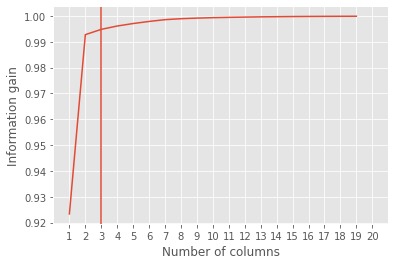

In [0]:
from matplotlib import style
style.use('ggplot')
plt.plot(range(1,20),ab)
plt.axvline(x=3)
plt.xlim(0,21)
plt.xticks(range(1,21))
plt.xlabel('Number of columns')
plt.ylabel('Information gain')
plt.show()

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(vcol)
  

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_ratio_

array([0.9233704 , 0.06937074, 0.00205158])

In [0]:
pca.explained_variance_ratio_.sum()

0.9947927236500738

In [0]:
vcol.shape

(590540, 339)

In [0]:
vcol1=pca.transform(vcol)

In [0]:
vcol1.shape

(590540, 3)

In [0]:
train.drop(vcol,axis=1,inplace=True)

In [0]:
type(vcol1)

numpy.ndarray

In [0]:
vcol1 = pd.DataFrame(vcol1)

In [0]:
train=pd.concat([train,vcol1],axis=1)

In [0]:
cat_cols = ['id_12','id_15', 'id_16', 'id_23', 
            'id_27', 'id_28', 'id_29','id_30', 'id_31', 'id_33', 'id_34', 'id_35', 
            'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

##Label Encoding categorical variables

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
  if i in train.columns:
    train[i] = le.fit_transform(train[i].astype(str).values)

In [0]:
y= train['isFraud']
print(y.shape)

(590540,)


In [0]:
x = train.drop(['isFraud','TransactionID','TransactionDT'],axis=1)
print(x.shape)

(590540, 85)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.3, random_state=1)

In [0]:
print('Number of Not fraud cases in entire dataset',len(train[train['isFraud']==0]))
print('Number of fraud cases in entire dataset',len(train[train['isFraud']==1]))

Number of Not fraud cases in entire dataset 569877
Number of fraud cases in entire dataset 20663


In [0]:
print('Number of Not fraud cases in training ',len(y_train[y_train == 0]))
print('Number of fraud cases in training ',len(y_train[y_train == 1]))

Number of Not fraud cases in training  398914
Number of fraud cases in training  14464


In [0]:
print('Number of Not fraud cases in test dataset ',len(y_test[y_test == 0]))
print('Number of fraud cases in test dataset',len(y_test[y_test == 1]))

Number of Not fraud cases in test dataset  170963
Number of fraud cases in test dataset 6199


In [0]:
(len(y_train[y_train == 0]))/(len(y_train[y_train == 0])+len(y_train[y_train == 1])),(len(y_train[y_train == 1]))/(len(y_train[y_train == 0])+len(y_train[y_train == 1]))

(0.965010232765169, 0.034989767234831076)

In [0]:
(len(y_test[y_test == 0]))/(len(y_test[y_test == 0])+len(y_test[y_test == 1])),(len(y_test[y_test == 1]))/(len(y_test[y_test == 0])+len(y_test[y_test == 1]))

(0.9650094264006954, 0.03499057359930459)

In [0]:
len(y_test[y_test == 0])

170963

In [0]:
len(y_test[y_test == 1])

6199

#Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)                        #fitting the logistic regression on training set
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict = model.predict(x_test)  #predicting the class of test labels

In [0]:
model.score(x_train,y_train)      #checking the accuracy score for training

0.966014156534697

In [0]:
model.score(x_test,y_test)        #checking the accuracy score for testing

0.9659690001241801

In [0]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.metrics import confusion_matrix,roc_auc_score
roc_auc_score(y_test,predict)      #checking roc_auc_score

0.5233508506098875

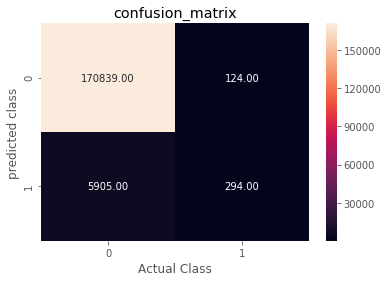

In [0]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [0]:
lr_probs = model.predict_proba(x_test)    #predicting probability of test labels
lr_probs

array([[0.9790683 , 0.0209317 ],
       [0.97525072, 0.02474928],
       [0.96311216, 0.03688784],
       ...,
       [0.98131403, 0.01868597],
       [0.97441681, 0.02558319],
       [0.98502427, 0.01497573]])

In [0]:
a = lr_probs[:,1] 

In [0]:
fn = []
fp = []
for j in np.arange(0,1,step=0.01):
  predict = np.zeros(len(a))
  for i in range(len(a)):            #FN and FP  rates with different thresholds from 0 to 1
    if a[i] > j:
      predict[i] = 1
    else:
      predict[i] = 0
  conf = np.array(confusion_matrix(y_test,predict))
  fn.append(conf[1,0])
  fp.append(conf[0,1])

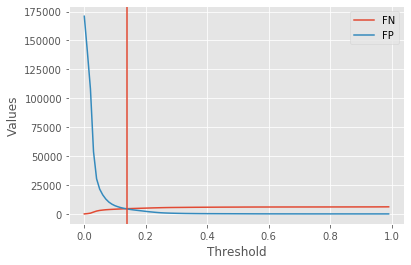

In [0]:
plt.plot(np.arange(0,1,step=0.01),fn,label='FN')
plt.plot(np.arange(0,1,step=0.01),fp,label='FP')   #plotting FN and FP 
plt.axvline(0.14)
plt.xlabel('Threshold')
plt.ylabel('Values')
plt.legend()
plt.show()

In [0]:
acc = []
tp = []
for j in np.array([0.14,0.15,0.16]):
  predict = np.zeros(len(a))
  for i in range(len(a)):
    if a[i] > j:
      predict[i] = 1
    else:
      predict[i] = 0
  conf = np.array(confusion_matrix(y_test,predict))
  tp.append(conf[1,1])
  acc.append((conf[0,0]+conf[1,1])/len(predict))

In [0]:
roc_auc_score(y_test,predict)

0.6106512235010324

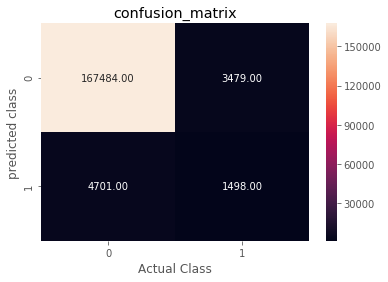

In [0]:
sns.heatmap(conf,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

#Decision Tree 

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
predict = model.predict(x_test)

In [0]:
roc_auc_score(y_test,predict)

0.7755232992215112

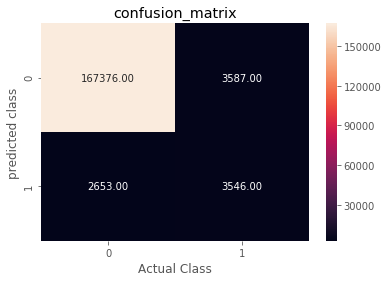

In [0]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

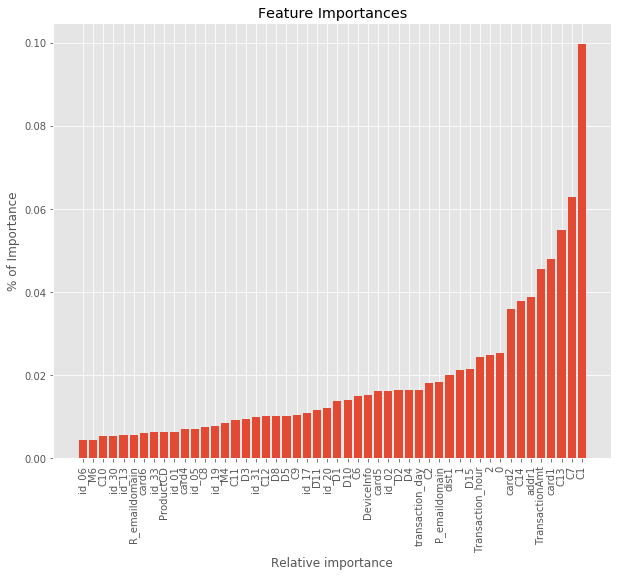

In [0]:
features = x_train.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-50:]
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.ylabel('% of Importance')
plt.xticks(rotation=90)
plt.show()

#RandomForest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier #importing the RandomForestClassifier library for our decision tree classifier
model = RandomForestClassifier(n_estimators=100,random_state=1)    #creating the instance of classifier with 100 trees
model.fit(x_train,y_train)                          #fitting our model on training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
predict = model.predict(x_test)

In [0]:
roc_auc_score(y_test,predict)

0.7346823378842127

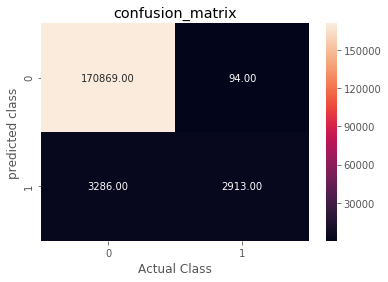

In [0]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()